> # Optimizer #

Another way to increase train speed is to consider some optimizers more faster than standard gradient descent. 

In [1]:
import tensorflow as tf
from tensorflow import keras

### 1. Momentum optimization ###

Principle of momentum optimization is like a ball on slope. It starts very slowly, but it's accelerating. 

Momentum optimization think previous gradient highly important. Its operation follows below fomulars. It uses gradient acceleration, not speed. To prevent momentum getting too big, a new hyperparameter $\beta$ appears. This is set 0 to 1. General value is 0.9

1. $\mathbf{m} \leftarrow \beta\ \mathbf{m} - \eta \triangledown_\theta J(\theta) $

2. $\theta \leftarrow \theta + \mathbf{m}$

If gradient is constant, scale of updating weight is same with multiplying $\frac{1}{1-\beta}$ at $\eta \triangledown_\theta J(\theta)$. So if $\beta = 0.9$, its speed is ten times higher than standard gradient descent. This helps to escape flat area faster. And it also helps to jump over local minimum. It works well at 0.9 momentum and is faster than standard gradient descent.

In [2]:
optimizer = keras.optimizers.SGD(lr=0.0001, momentum=0.9)

### 2. NAG ###

Nestrov accelerated gradient(NAG) is to operate gradient of cost function at $\theta + \beta \ \mathbf{m}$ not current location $\theta$.

1. $\mathbf{m} \leftarrow \beta\ \mathbf{m} - \eta \triangledown_\theta J(\theta + \beta \ \mathbf{m}) $

2. $\theta \leftarrow \theta + \mathbf{m}$



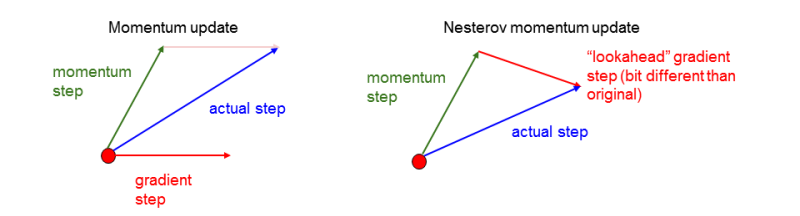

Like image, use gradient measured after moving toward momentum direction instead of gradient at currnet location. It's generally more accurate and faster than basic momentum optimization. 

In [3]:
optimizer = keras.optimizers.SGD(lr=0.0001, momentum=0.9, nesterov=True)

### 3. AdaGrad ###

In a long bowl problem, basic gradient descent follows steep slope and goes down slowly. So it takes time. AdaGrad algorithmn follows the steepest dimension and reduces scale of gradient vector.

1. $\mathbf{s} \leftarrow \mathbf{s} + \triangledown_\theta J(\theta) \otimes \triangledown_\theta J(\theta) $

2. $\theta \leftarrow \theta - \eta\triangledown_\theta J(\theta) \oslash \sqrt{\mathbf{s} + \epsilon}$

Fisrt step is to accumulate square of gradient at $\mathbf{s}$. It is same with operating square of gradient's element at element of $\mathbf{s}$. So if cost function is steep flowwing $i$th dimension, that $i$th element of $\mathbf{s}$ is getting more bigger.

Second step is to subtract gradient vector divided by $\sqrt{\mathbf{s}+\epsilon}$ at current weight. $\epsilon$ is a vlaue to prevent denominator to be 0 and is generally 1e-10.

This algorithmn reduces learning rate but gradient is quickly reduced about steep dimension. This called adaptive learning rate. It helps to go straight toward global minimum point. We don't have to tune learning rate $\eta$.

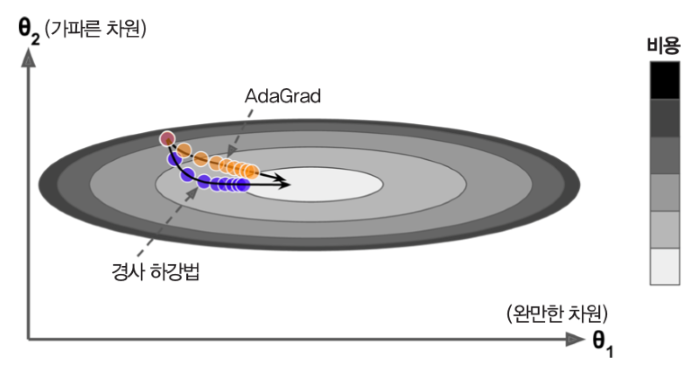

AdaGrad works well in simple 2-dimensional porblem. But sometimes it stops too early since learning rate is reduced too much. So we should not use AdaGrad in DNN.

### 3. RMSProp ###

**RMSProp** solves AdaGrad's problem by just accumulating gradient repeated at the most recent iteration. For that, we use exponential reduction in first step.

1. $\mathbf{s} \leftarrow \beta \mathbf{s} + (1-\beta)\triangledown_\theta J(\theta) \otimes \triangledown_\theta J(\theta) $

2. $\theta \leftarrow \theta - \eta\triangledown_\theta J(\theta) \oslash \sqrt{\mathbf{s} + \epsilon}$

$\beta$ is usually 0.9. It works well in 0.9. So we don't have to tune it. This algorithmn always has better performance than AdaGrad.

In [4]:
optimizer = keras.optimizers.RMSprop(lr=0.0001, rho=0.9)

### 4. Adam and Nadam ###

**Adam**(adaptive moment estimation)combines momentum optimization and RMSProp. It follows exponential decaying average of previous gradient and same of square of previous gradient.

1. $\mathbf{m} \leftarrow \beta_1 \mathbf{m} - (1-\beta_1)\triangledown_\theta J(\theta)$

2. $\mathbf{s} \leftarrow \beta_2 \mathbf{s} + (1-\beta_2)\triangledown_\theta J(\theta) \otimes \triangledown_\theta J(\theta)$

3. $\hat{\mathbf{m}} \leftarrow \mathbf{m}\ /\ (1-\beta_1^t)$

4. $\hat{\mathbf{s}} \leftarrow \mathbf{s}\ /\ (1-\beta_2^t)$

5. $\theta \leftarrow - \eta \ \hat{\mathbf{m}} \oslash \sqrt{\hat{\mathbf{s}} + \epsilon}$

$t$ means iteration number.

Since $ \mathbf{m}$ and $\mathbf{s}$ are initialized to 0, it leans to 0. So step 3 and 4 help to amplify $ \mathbf{m}$ and $\mathbf{s}$ at early in train.

$\beta_1$(momentum reduction hyperparameter) is usually initialized 0.9 and $\beta_2$(scale reduction hyperparameter) is usually 0.999. And $\epsilon$ is usually initialized 1e-7 for stable operation.

In [6]:
optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

Since Adam is adaptive learning rate algorithm, we don't have to tune $\eta$.

**Nadam** adds Nesterov method to Adam. So it often converges faster than Adam.

### 5. Learning Rate Scheduling

Optimal learning rate is also important. Inappropriate learning rate becomes obstacle to get best model. 


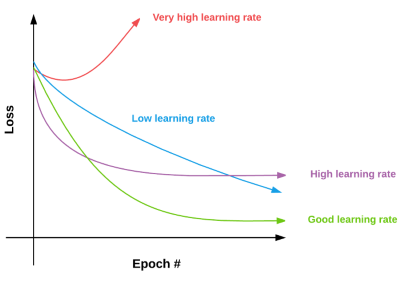

There is a good method to search optimal learning rate. Start at high learning rate and reduce it when learning speed gets slow down. If we apply the method, we can search good solution more quickly. This strategy is called learning schedule.

- **Power Scheduling** : Set learning rate $\eta(t) = \eta_0 \ / \ (1+t/s)^c$ about iteration number $t$. initial learning rate $\eta_0$, power number $c$, step sumber $s$ are hyperparameters. Learning rate decreases at each step. It becomes $\eta_0/2$ after $s$th step. And after more $s$th, it becomes $\eta_0\ / \ 3$, $\eta_0 \ / \ 4$, $\eta_0 \ / \ 5$ and so on. We have to tune $\eta_0$ and $s$.

- **Exponential Scheduling** : Set learning rate $\eta(t) = \eta_0 \ 0.1^{t/s}$. Learning rate will decrease 10 times at each $s$ steps. Reduction rate is consistent.

- **Piecewise Constant Scheduling** : Use constant learning rate during several epochs(ex, 0.1 in 5 epochs). And use less learning rate during another number of epochs(ex, 0.001 in 50 epochs). To find optimal learning rate and number of epochs, we have to change a lot.

- **Performance Scheduling** : Calculate validation error each $N$ step. If error doesn't decrease, reduce learning rate $\lambda$ times.

- **1Cycle Scheduling** : 1Cycle method linearly increases initial learning rate $\eta_0$ to $\eta_1$ during half of train. Then linearly reduce the learning rate to $\eta_0$ during next half of train. And in last some epochs, reduce decimal points. Maximum learning rate $\eta_1$ is choosen by same method with the way finding optimal learning rate. $\eta_0$ is usually $\eta_1 \ / \ 10$

Power based scheduling is easest to realize.

In [9]:
optimizer = keras.optimizers.SGD(lr=0.001, decay=1e-4)

**decay** is a reciprocal number of $s$. And $c$ is supposed to 1.

In [10]:
def exponenital_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0*0.1**(epoch/s)
    return exponential_decay_fn

exponential_decay_fn = exponenital_decay(0.001, 20)

In [11]:
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)

## Using it in model
## history = model.fit(callbacks=[lr_scheduler])

When save model, optimizer and learning rate is saved together. If we use new schedule function, we can load the model and continue train step. But epoch is initialized to 0. So we can use **initial_epoch** in **fit** method.

To use prewise constant scheduling, we can use under schedule function. Then make **LearningRateScheduler** callback and send it to **fit** method.

In [12]:
def piecewise_constant_fn(epoch):
    if epoch<5:
        return 0.01
    if epoch<15:
        return 0.005
    else:
        return 0.001

For performance scheduling, use **ReduceLROnPlateau**. For example, if we send next callback to **fit** method, multiple 0.5 at learning rate at every time val_error doesn't improve for five times.

In [13]:
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)

Another way is to use one schedule in **keras.optimizers.schedules**. Then we can update learning rate in each step. Under code is to realize exponential based scheduling.

In [15]:
X_train=[1,2,3,4,5,5,6,7,8,9]

s = 20*len(X_train) // 32
learning_rate = keras.optimizers.schedules.ExponentialDecay(0.01, s, 0.1)
optimizer = keras.optimizers.SGD(learning_rate)